In [61]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [62]:

def corners_unwarp(img, pts, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    img_undistort = cv2.undistort ( img, mtx, dist, None, mtx)
    # 2) Convert to grayscale
    img_gray = cv2.cvtColor(img_undistort, cv2.COLOR_BGR2GRAY)
    # a-b) Find the source points (given as input)
    src = pts
    # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
    dst = np.float32([[320,720], [320,0], [960, 0], [960,720]])
    # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
    M = cv2.getPerspectiveTransform(src, dst) # src, dst are arrays of points
    Minv = cv2.getPerspectiveTransform(dst, src)
    # e) use cv2.warpPerspective() to warp your image to a top-down view
    img_size = img_gray.shape[::-1]
    warped = cv2.warpPerspective(img_undistort, M, img_size, flags=cv2.INTER_LINEAR)
     
    return warped, M, Minv


[[-0.24688832 -0.02372817 -0.00109843  0.00035105 -0.00259133]]
[[1.15777942e+03 0.00000000e+00 6.67111050e+02]
 [0.00000000e+00 1.15282305e+03 3.86129068e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


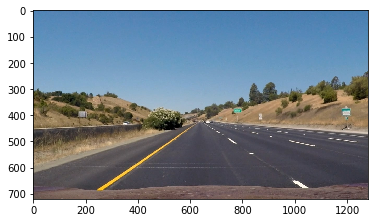

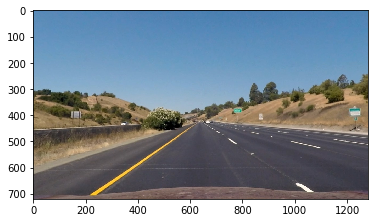

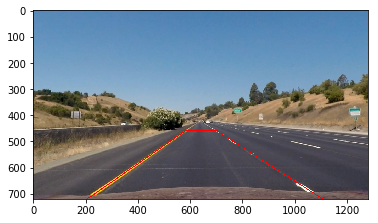

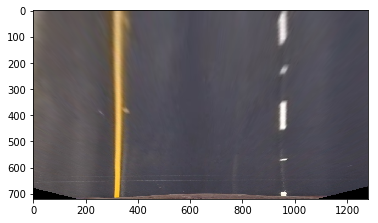

In [65]:
import pickle
import os

src_pts = np.float32([[206, 720], [581, 460], [702, 460], [1107, 720]])
camera_values = pickle.load(open('camera_values.p', 'rb'))
mtx, dist = camera_values['mtx'], camera_values['dist']
img = cv2.cvtColor(cv2.imread('test_images/straight_lines1.jpg'), cv2.COLOR_BGR2RGB)
img_undistort = cv2.undistort ( img, mtx, dist, None, mtx)

out_dir = 'transform'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)



plt.figure()
plt.imshow(img)
plt.figure()
plt.imshow(img_undistort)
cv2.imwrite(out_dir+'/undistort.png', img_undistort)

plt.figure()
cv2.polylines(img_undistort, np.int32([src_pts]), isClosed=True, color=(255, 0, 0), thickness=2)
plt.imshow(img_undistort)

img_warped, M, Minv = corners_unwarp(img, src_pts, mtx, dist)
cv2.imwrite(out_dir+'/warped.png', img_warped)
plt.figure()
plt.imshow(img_warped)

print(dist)
print(mtx)

transform_params = dict()
transform_params['M'] = M
transform_params['Minv'] = Minv
pickle.dump(transform_params, open('topdown_transform.p', 'wb'))